In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
import re

In [227]:
news_data = pd.read_csv("FakeNewsNet.csv")
news_data.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [228]:
data = news_data.copy()
data.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [229]:
data.shape

(23196, 5)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


# calculating null values 

In [231]:
data.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

# calculating duplicate values in all columns

In [232]:
data.duplicated().sum()

137

# dropping duplicates

In [233]:
data.drop_duplicates(inplace=True)

In [234]:
data.duplicated().sum()

0

# dropping null values according to rows

In [235]:
data.dropna(axis=0,how="any",inplace=True)

In [236]:
data.isnull().sum()

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

In [237]:
data.shape

(22730, 5)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          22730 non-null  object
 1   news_url       22730 non-null  object
 2   source_domain  22730 non-null  object
 3   tweet_num      22730 non-null  int64 
 4   real           22730 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


# EDA

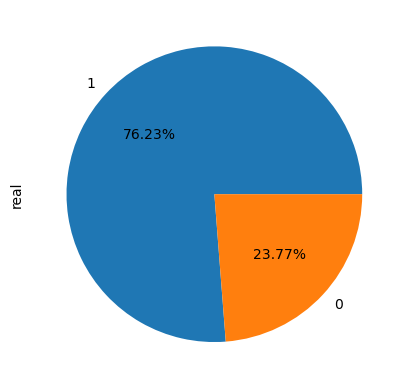

In [239]:
data["real"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [258]:
data.head()

,title,news_url,source_domain,tweet_num,real,cleaned
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,kandi burruss explod rape accus real housew at...
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,peopl choic award best red carpet look
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,sophia bush send sweet birthday messag one tre...
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,colombian singer maluma spark rumour inappropr...
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,gossip girl year later upper east sider shock ...


# Data cleaning using regex,stemmer and stopword

In [241]:
stop_words = stopwords.words("english")
data["cleaned"] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]"," ",x).lower().split() if i not in stop_words]),data["title"]))
stemmer = PorterStemmer()

data["cleaned"] = data["cleaned"].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
data.head()

,title,news_url,source_domain,tweet_num,real,cleaned
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,kandi burruss explod rape accus real housew at...
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,peopl choic award best red carpet look
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,sophia bush send sweet birthday messag one tre...
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,colombian singer maluma spark rumour inappropr...
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,gossip girl year later upper east sider shock ...


# Feature selection

In [259]:
X = data["cleaned"]
y = data["real"]

# Model selection

In [260]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1,stratify=y)

In [244]:
logreg = LogisticRegression()
tfidf = TfidfVectorizer()

pipeline = Pipeline([("tfidf",tfidf),
                     ("chi",SelectKBest(chi2,k=2000)),
                     ("clf",logreg)])

pipeline.fit(x_train,y_train)


y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

Training accuracy:  0.8459634843818742
Test accuracy:  0.8334799824021117


# Best model logistic regression

In [261]:
# from sklearn.svm import SVC
# svc = SVC(C=.2,kernel="rbf",gamma="scale")

# pipeline2 = Pipeline([("vect",tfidf),
#                      ("chi",SelectKBest(chi2,k=2000)),
#                      ("clf",svc)])

# pipeline2.fit(x_train,y_train)

# #rbf,.2 or .3,scale
# #sigmoid,.1,scale

In [246]:
# y_pred_train = pipeline2.predict(x_train)
# y_pred_test = pipeline2.predict(x_test)

# print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
# print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

In [247]:
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier()

# pipeline3 = Pipeline([("vect",tfidf),
#                      ("chi",SelectKBest(chi2,k=2000)),
#                      ("clf",dtc)])

# pipeline3.fit(x_train,y_train)

In [248]:
# y_pred_train = pipeline3.predict(x_train)
# y_pred_test = pipeline3.predict(x_test)

# print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
# print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

In [249]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators=150,min_samples_split=50,max_depth=100,random_state=1)

# pipeline4 = Pipeline([("vect",tfidf),
#                      ("chi",SelectKBest(chi2,k=1500)),
#                      ("clf",rfc)])

# pipeline4.fit(x_train,y_train)

In [250]:
# y_pred_train = pipeline4.predict(x_train)
# y_pred_test = pipeline4.predict(x_test)

# print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
# print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

In [251]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=12)

# pipeline5 = Pipeline([("vect",tfidf),
#                      ("chi",SelectKBest(chi2,k=2000)),
#                      ("clf",knn)])

# pipeline5.fit(x_train,y_train)

In [252]:
# y_pred_train = pipeline5.predict(x_train)
# y_pred_test = pipeline5.predict(x_test)

# print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
# print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

In [253]:
# from sklearn.linear_model import SGDClassifier

# sgd = SGDClassifier()

# pipeline6 = Pipeline([("tfidf",tfidf),
#                      ("chi",SelectKBest(chi2,k=2000)),
#                      ("clf",sgd)])

# pipeline6.fit(x_train,y_train)


In [254]:
# y_pred_train = pipeline6.predict(x_train)
# y_pred_test = pipeline6.predict(x_test)

# print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
# print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

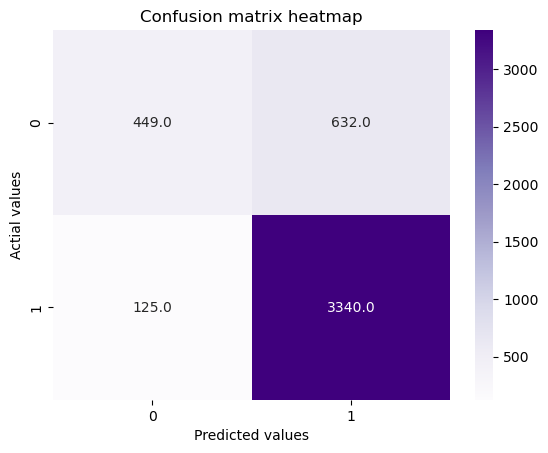

In [255]:
from sklearn.metrics import confusion_matrix,classification_report

conf_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf_matrix,annot=True,cmap='Purples',fmt=".1f")
plt.xlabel("Predicted values")
plt.ylabel("Actial values")
plt.title("Confusion matrix heatmap")
plt.show()

In [256]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.42      0.54      1081
           1       0.84      0.96      0.90      3465

    accuracy                           0.83      4546
   macro avg       0.81      0.69      0.72      4546
weighted avg       0.83      0.83      0.81      4546



In [257]:
#data.to_csv("cleaned_fake_news.csv")